# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns # sets the aesthetics for the graphs
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Initialize data frame to store data from API calls
cities_dfs= pd.DataFrame(cities)
Weather_df= cities_dfs.rename(columns={0:"City"})
Weather_df["Cloudiness"] = ""
Weather_df["Country"] = ""
Weather_df["Date"] = ""
Weather_df["Humidity"] = ""
Weather_df["Latitude"] = ""
Weather_df["Longitude"] = ""
Weather_df["Max Temp"] = ""
Weather_df["Wind Speed"] = ""


In [4]:
#Build API calls for each city and add to table
count = 1 # counter to count the number of calls to API
sets = 0 # counter to count the number of call sets
index = 0 # index for the cities pd 
t0 =time.time() #current time
print("Beginning Data Retrieval--------")
for index, row in Weather_df.iterrows():
    city= row['City']
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = f"{base_url}appid={api_key}&units={units}&q="
    response = requests.get(query_url+ city).json()
    print(f"Processing Record {count} of Set {sets}| {city}")
    
    try:
        Weather_df.loc[index, "Max Temp"] = response['main']['temp_max']
        Weather_df.loc[index, "Humidity"] = response['main']['humidity']
        Weather_df.loc[index, "Cloudiness"] = response['clouds']['all']
        Weather_df.loc[index, "Country"] = response['sys']['country']
        Weather_df.loc[index, "Date"] = response['dt']
        Weather_df.loc[index, "Wind Speed"] = response['wind']['speed']
        Weather_df.loc[index, "Latitude"] = response['coord']["lat"]
        Weather_df.loc[index, "Longitude"] = response['coord']["lon"]
    except (KeyError, IndexError):
        print("City was not found.")
    count= count + 1
    if count == 50: 
        count = 1 
        sets = sets+1
        time.sleep(65)
        t0=time.time()
print("Data Retrieval Complete")


Beginning Data Retrieval--------
Processing Record 1 of Set 0| anadyr
Processing Record 2 of Set 0| maldonado
Processing Record 3 of Set 0| bluff
Processing Record 4 of Set 0| hermanus
Processing Record 5 of Set 0| mahebourg
Processing Record 6 of Set 0| umm jarr
City was not found.
Processing Record 7 of Set 0| tunduru
City was not found.
Processing Record 8 of Set 0| jacareacanga
Processing Record 9 of Set 0| rikitea
Processing Record 10 of Set 0| severo-kurilsk
Processing Record 11 of Set 0| souillac
Processing Record 12 of Set 0| amderma
City was not found.
Processing Record 13 of Set 0| saleaula
City was not found.
Processing Record 14 of Set 0| ribeira grande
Processing Record 15 of Set 0| isangel
Processing Record 16 of Set 0| ushuaia
Processing Record 17 of Set 0| new norfolk
Processing Record 18 of Set 0| mar del plata
Processing Record 19 of Set 0| barcelos
Processing Record 20 of Set 0| punta arenas
Processing Record 21 of Set 0| nishihara
Processing Record 22 of Set 0| mata

Processing Record 47 of Set 3| rungata
City was not found.
Processing Record 48 of Set 3| brae
Processing Record 49 of Set 3| brandon
Processing Record 1 of Set 4| gat
Processing Record 2 of Set 4| husavik
Processing Record 3 of Set 4| warqla
City was not found.
Processing Record 4 of Set 4| karauzyak
City was not found.
Processing Record 5 of Set 4| makakilo city
Processing Record 6 of Set 4| chapais
Processing Record 7 of Set 4| saskylakh
Processing Record 8 of Set 4| mehtar lam
Processing Record 9 of Set 4| naze
Processing Record 10 of Set 4| rocha
Processing Record 11 of Set 4| lavrentiya
Processing Record 12 of Set 4| christchurch
Processing Record 13 of Set 4| nuuk
Processing Record 14 of Set 4| dicabisagan
Processing Record 15 of Set 4| tondano
Processing Record 16 of Set 4| vostok
Processing Record 17 of Set 4| najran
Processing Record 18 of Set 4| falmouth
Processing Record 19 of Set 4| tezu
Processing Record 20 of Set 4| victoria
Processing Record 21 of Set 4| beringovskiy
Pr

Processing Record 45 of Set 7| timon
Processing Record 46 of Set 7| merzifon
Processing Record 47 of Set 7| iida
Processing Record 48 of Set 7| kemijarvi
City was not found.
Processing Record 49 of Set 7| omboue
Processing Record 1 of Set 8| tubuala
Processing Record 2 of Set 8| saryozek
Processing Record 3 of Set 8| le port
Processing Record 4 of Set 8| quatre cocos
Processing Record 5 of Set 8| betioky
City was not found.
Processing Record 6 of Set 8| yarmouth
Processing Record 7 of Set 8| macamic
Processing Record 8 of Set 8| fairbanks
Processing Record 9 of Set 8| behbahan
Processing Record 10 of Set 8| bud
Processing Record 11 of Set 8| sorvag
City was not found.
Processing Record 12 of Set 8| luneville
Processing Record 13 of Set 8| ponta delgada
Processing Record 14 of Set 8| puerto carreno
Processing Record 15 of Set 8| kirakira
Processing Record 16 of Set 8| altay
Processing Record 17 of Set 8| sharjah
Processing Record 18 of Set 8| samusu
City was not found.
Processing Record

Processing Record 43 of Set 11| baiyin
Processing Record 44 of Set 11| chase
Processing Record 45 of Set 11| dharan
Processing Record 46 of Set 11| paoua
Processing Record 47 of Set 11| nadym
Processing Record 48 of Set 11| umzimvubu
City was not found.
Processing Record 49 of Set 11| bolungarvik
City was not found.
Processing Record 1 of Set 12| bundaberg
Processing Record 2 of Set 12| tanhacu
Processing Record 3 of Set 12| dhidhdhoo
Processing Record 4 of Set 12| srednekolymsk
Processing Record 5 of Set 12| manokwari
Processing Record 6 of Set 12| almaznyy
Processing Record 7 of Set 12| biskamzha
Processing Record 8 of Set 12| ahipara
Processing Record 9 of Set 12| manta
Processing Record 10 of Set 12| kiunga
Processing Record 11 of Set 12| havelock
Processing Record 12 of Set 12| elesbao veloso
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Display the count of cities with weather data
Weather_df.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Latitude      539
Longitude     539
Max Temp      539
Wind Speed    539
dtype: int64

In [11]:
# save to csv file and display
Weather_NA= Weather_df.replace('', np.nan) 
Weather_df= Weather_NA.dropna()
Weather_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)
Weather_df.head(10)





,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,anadyr,90.0,RU,1.538705e+09,81.0,64.73,177.51,46.40,17.90
1,maldonado,0.0,UY,1.538705e+09,66.0,-34.91,-54.96,50.00,6.93
2,bluff,0.0,AU,1.538708e+09,30.0,-23.58,149.07,87.26,9.64
3,hermanus,32.0,ZA,1.538708e+09,89.0,-34.42,19.24,44.87,3.60
4,mahebourg,75.0,MU,1.538705e+09,60.0,-20.41,57.70,71.60,10.29
7,jacareacanga,8.0,BR,1.538708e+09,82.0,-6.22,-57.76,79.25,1.59
8,rikitea,88.0,PF,1.538708e+09,100.0,-23.12,-134.97,69.80,13.00
9,severo-kurilsk,20.0,RU,1.538708e+09,85.0,50.68,156.12,50.18,25.75
10,souillac,0.0,FR,1.538707e+09,87.0,45.60,-0.60,57.20,6.93
13,ribeira grande,48.0,PT,1.538708e+09,100.0,38.52,-28.70,71.06,20.27


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

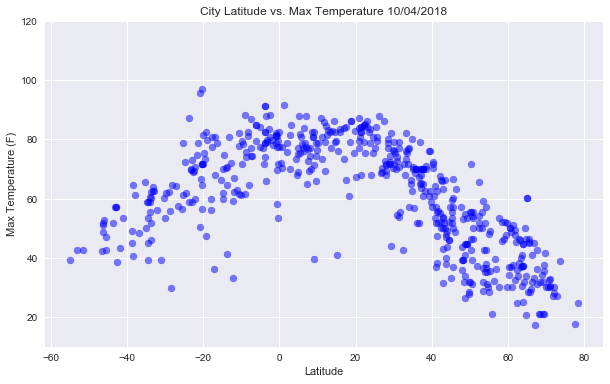

In [22]:
plt.figure(figsize=(10,6))
sns.set()
date=time.strftime("%m/%d/%Y")
plt.scatter(Weather_df["Latitude"], Weather_df["Max Temp"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.show()

#### Latitude vs. Humidity Plot

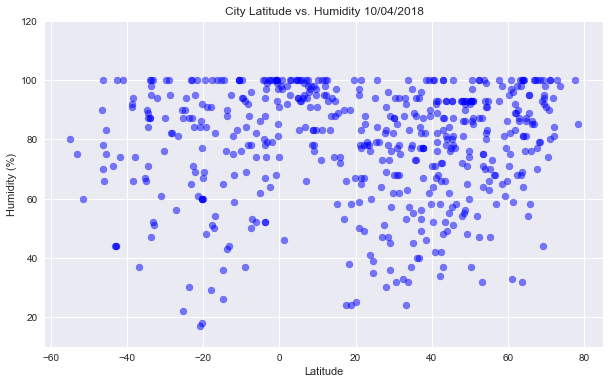

In [24]:
plt.figure(figsize=(10,6))
sns.set()
date=time.strftime("%m/%d/%Y")
plt.scatter(Weather_df["Latitude"], Weather_df["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity {date}")
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

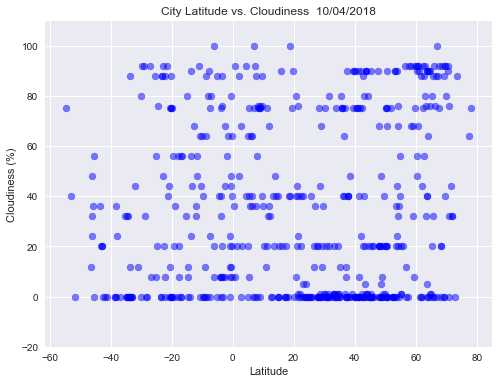

In [28]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(Weather_df["Latitude"], Weather_df["Cloudiness"], color='blue', alpha=0.5)
plt.ylim(-20,(Weather_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness  {date}")
plt.show()

#### Latitude vs. Wind Speed Plot

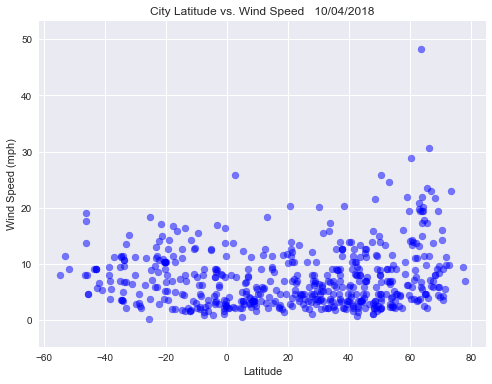

In [29]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(Weather_df["Latitude"], Weather_df["Wind Speed"], color='blue', alpha=0.5)
plt.ylim((Weather_df["Wind Speed"].min()-5),(Weather_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed   {date}")
plt.show()